In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.gray()

from sklearn.decomposition import PCA
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier

<Figure size 432x288 with 0 Axes>

In [2]:
df = pd.read_csv('fashion-mnist_train.csv')
df.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### labels meaning
0- T-shirt<br/>
1- pants<br/>
2- sweater<br/>
3- dress<br/>
4- coat<br/>
5- sandals<br/>
6- shirt<br/>
7- sneakers<br/>
8- bag<br/>
9- boots

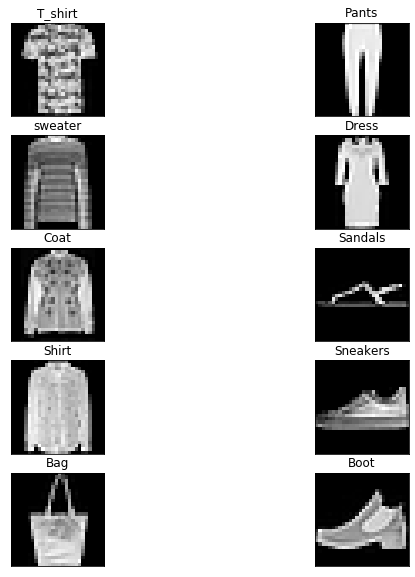

In [3]:
class_names = ['T_shirt', 'Pants', 'sweater', 'Dress', 'Coat', 
               'Sandals', 'Shirt', 'Sneakers', 'Bag', 'Boot']
plt.figure(figsize=(10, 10))
i = 0
indx = 0 
sample_arr = np.zeros(10, dtype = int)
while(i<=9):
    if(df['label'][indx] == i):
        plt.subplot(5, 2, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(df.drop(['label'], axis = 1).to_numpy()[indx].reshape((28,28)))
        label_index = df['label'][indx]
        plt.title(class_names[label_index])
        i = i+1
        indx = 0
    indx = indx+1
plt.show()

In [4]:
y = df['label'].copy()
X = df.drop(['label'], axis = 1)

In [5]:
pca1 = PCA(n_components= 1)
pca5 = PCA(n_components= 5)
pca10 = PCA(n_components= 10)

X1 = X.copy()
X5 = X.copy()
X10 = X.copy()

pca1.fit(X1)
dfpca1 = pca1.transform(X1)
pca5.fit(X5)
dfpca5 = pca5.transform(X5)
pca10.fit(X10)
dfpca10 = pca10.transform(X10)

In [6]:
gb = GaussianNB()
ada1000 = AdaBoostClassifier(n_estimators=1000, random_state=0)
ada500 = AdaBoostClassifier(n_estimators=500, random_state=0)
rfc = RandomForestClassifier(n_estimators=1000 ,max_depth=2, random_state=0)
mlp = MLPClassifier(random_state=1,hidden_layer_sizes=(100,) ,activation='logistic', solver='sgd', learning_rate='adaptive', warm_start=False)
vc = VotingClassifier(estimators=[('gnb', gb), ('rf', rfc), ('nn', mlp)], voting='soft')

In [7]:
cvgbpca10 = cross_validate(gb, dfpca10, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [8]:
cvada1000pca10 = cross_validate(ada1000, dfpca10, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [9]:
cvada500pca10 = cross_validate(ada500, dfpca10, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [10]:
cvrfcpca10 = cross_validate(rfc, dfpca10, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [11]:
cvvcpca10 = cross_validate(vc, dfpca10, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [12]:
cvmlppca1 = cross_validate(mlp, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [13]:
cvmlppca5 = cross_validate(mlp, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [14]:
cvmlppca10 = cross_validate(mlp, dfpca10, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [15]:
cvvcpca1 = cross_validate(vc, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [16]:
cvvcpca5 = cross_validate(vc, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [17]:
cvrfcpca1 = cross_validate(rfc, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [18]:
cvrfcpca5 = cross_validate(rfc, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [19]:
cvgbpca1 = cross_validate(gb, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [20]:
cvada1000pca1 = cross_validate(ada1000, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [21]:
cvada500pca1 = cross_validate(ada500, dfpca1, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [22]:
cvgbpca5 = cross_validate(gb, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [23]:
cvada1000pca5 = cross_validate(ada1000, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

In [24]:
cvada500pca5 = cross_validate(ada500, dfpca5, y, cv=5, n_jobs=-1, scoring=('f1_micro'))

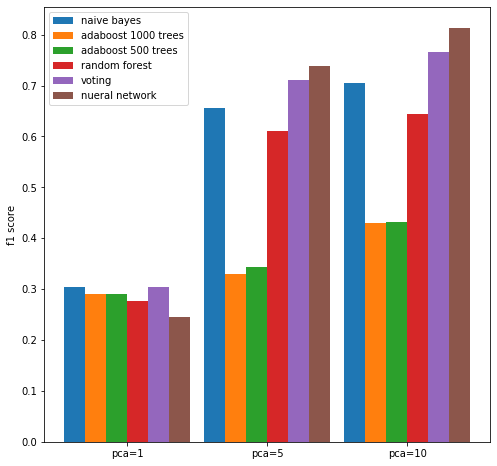

In [25]:
plt.figure(figsize=(8, 8))
N = 3
naive_bayes_means = [ cvgbpca1['test_score'].mean(), cvgbpca5['test_score'].mean(), cvgbpca10['test_score'].mean()]
adaboost1000_means = [ cvada1000pca1['test_score'].mean(), cvada1000pca5['test_score'].mean(), cvada1000pca10['test_score'].mean()]
adaboost500_means = [ cvada500pca1['test_score'].mean(), cvada500pca5['test_score'].mean(), cvada500pca10['test_score'].mean()]
randomforest_means = [ cvrfcpca1['test_score'].mean(), cvrfcpca5['test_score'].mean(), cvrfcpca10['test_score'].mean()]
voting_means = [cvvcpca1['test_score'].mean(), cvvcpca5['test_score'].mean(), cvvcpca10['test_score'].mean()]
mlp_means = [cvmlppca1['test_score'].mean(), cvmlppca5['test_score'].mean(), cvmlppca10['test_score'].mean()]

ind = np.arange(N) 
width = 0.15  
plt.bar(ind - 2*width, naive_bayes_means, width, label='naive bayes')
plt.bar(ind - width, adaboost1000_means, width, label='adaboost 1000 trees')
plt.bar(ind, adaboost500_means, width, label='adaboost 500 trees')
plt.bar(ind + width, randomforest_means, width, label='random forest')
plt.bar(ind + 2*width, voting_means, width, label='voting')
plt.bar(ind + 3*width, mlp_means, width, label='nueral network')

plt.ylabel('f1 score')

plt.xticks(ind + width / 2, ['pca=1', 'pca=5', 'pca=10'])
plt.legend(loc='best')
plt.show()

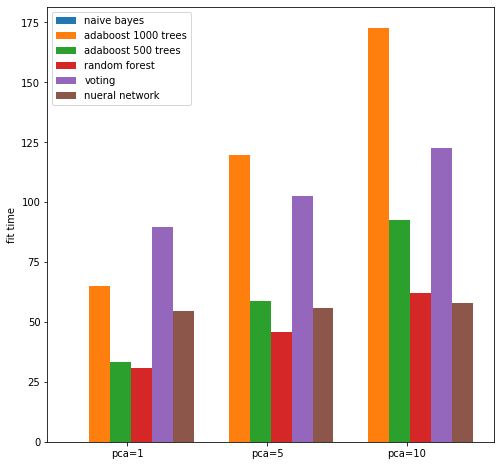

In [26]:
plt.figure(figsize=(8, 8))
N = 3
naive_bayes_means = [ cvgbpca1['fit_time'].mean(), cvgbpca5['fit_time'].mean(), cvgbpca10['fit_time'].mean()]
adaboost1000_means = [ cvada1000pca1['fit_time'].mean(), cvada1000pca5['fit_time'].mean(), cvada1000pca10['fit_time'].mean()]
adaboost500_means = [ cvada500pca1['fit_time'].mean(), cvada500pca5['fit_time'].mean(), cvada500pca10['fit_time'].mean()]
randomforest_means = [ cvrfcpca1['fit_time'].mean(), cvrfcpca5['fit_time'].mean(), cvrfcpca10['fit_time'].mean()]
voting_means = [ cvvcpca1['fit_time'].mean(), cvvcpca5['fit_time'].mean(), cvvcpca10['fit_time'].mean()]
mlp_means = [cvmlppca1['fit_time'].mean(), cvmlppca5['fit_time'].mean(), cvmlppca10['fit_time'].mean()]


ind = np.arange(N) 
width = 0.15     
plt.bar(ind - 2*width, naive_bayes_means, width, label='naive bayes')
plt.bar(ind - width, adaboost1000_means, width, label='adaboost 1000 trees')
plt.bar(ind, adaboost500_means, width, label='adaboost 500 trees')
plt.bar(ind + width, randomforest_means, width, label='random forest')
plt.bar(ind + 2*width, voting_means, width, label='voting')
plt.bar(ind + 3*width, mlp_means, width, label='nueral network')

plt.ylabel('fit time')

plt.xticks(ind + width / 3, ['pca=1', 'pca=5', 'pca=10'])
plt.legend(loc='best')
plt.show()

In [27]:
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

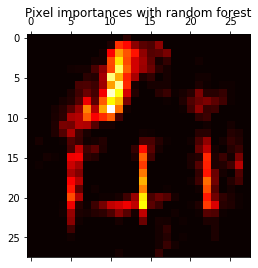

In [28]:
plt.matshow(rfc.feature_importances_.reshape(28,28), cmap=plt.cm.hot)
plt.title("Pixel importances with random forest")
plt.show()

In [29]:
test = pd.read_csv('fashion-mnist_test.csv')
y_test = test['label'].copy()
X_test = test.drop(['label'], axis=1).copy()

In [30]:
pca10.fit(X_test)
X_test = pca10.transform(X_test)

In [31]:
vc.fit(dfpca10, y)

C:\Users\roeeg\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


VotingClassifier(estimators=[('gnb',
                              GaussianNB(priors=None, var_smoothing=1e-09)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=2,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     m

In [32]:
y_pred = vc.predict(X_test)

In [33]:
f1_score(y_test, y_pred, average='micro')

0.459

In [34]:
dummy = DummyClassifier(strategy="stratified")
dummy.fit(dfpca5, y)
dummy_pred = dummy.predict(X_test)

In [35]:
f1_score(y_test, dummy_pred, average='micro')

0.1016

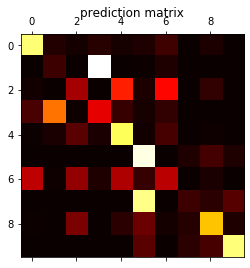

In [36]:
pred_mat = np.zeros((10,10), dtype=int)
for i in range(len(y_test)):
    pred_mat[y_test[i]][y_pred[i]] = pred_mat[y_test[i]][y_pred[i]]+1
plt.matshow(pred_mat, cmap=plt.cm.hot)
plt.title("prediction matrix")
plt.show()

In [37]:
###############################################################################

In [38]:
# 1- spontan
# 2- sync
# 3- alone

In [39]:
df1 = pd.read_csv('Evyatar636771050011691836Spontan.csv')
df1['label'] = 1
df4 = pd.read_csv('Evyatar636771052727603804Spontan.csv')
df4['label'] = 1
df2= pd.read_csv('Evyatar636771050902934708Sync.csv')
df5 = pd.read_csv('Evyatar636771053639929594Sync.csv')
df2['label'] = 2
df5['label'] = 2
df3= pd.read_csv('Evyatar636771051823980826Alone.csv')
df6 = pd.read_csv('Evyatar636771054555711409Alone.csv')
df3['label'] = 3
df6['label'] = 3
dfEvyatar = pd.concat([df1,df2,df3,df4,df5,df6])
dfEvyatar.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,64.40649,97265,left,2,-86.51942,171.7137,-8.232538,-22.53298,-150.8182,-73.03683,...,-152.1056,146.5586,3.271789,-386.4925,55.26245,16.62144,0.0,0.620941,0.0,1
1,64.40649,97265,right,2,143.81830,183.1156,-12.084150,53.41466,-405.3372,82.53658,...,196.7576,183.7971,34.498820,407.6624,78.40553,123.16780,0.0,0.259270,0.0,1
2,64.42323,97266,left,2,-86.83302,170.5757,-8.763070,-36.57425,-132.7273,-61.87682,...,-152.2468,145.2127,3.251141,-385.5093,51.27982,17.93486,0.0,0.637506,0.0,1
3,64.42323,97266,right,2,144.35500,179.8730,-11.506780,62.59536,-378.1917,67.33972,...,197.4556,182.1488,34.862010,409.7145,82.42125,126.79130,0.0,0.239628,0.0,1
4,64.43949,97268,left,2,-87.18336,168.2926,-10.102310,-15.97579,-139.7671,-75.22957,...,-152.4831,143.2971,3.186100,-382.7727,43.07076,22.46692,0.0,0.753420,0.0,1


In [40]:
df1 = pd.read_csv('Nofar636759792183061005Spontan.csv')
df1['label'] = 1
df4 = pd.read_csv('Nofar636759795182793299Spontan.csv')
df4['label'] = 1
df2= pd.read_csv('Nofar636759794200223541Sync.csv')
df5 = pd.read_csv('Nofar636759797397919664Sync.csv')
df2['label'] = 2
df5['label'] = 2
df3= pd.read_csv('Nofar636759793193137655Alone.csv')
df6 = pd.read_csv('Nofar636759796290435160Alone.csv')
df3['label'] = 3
df6['label'] = 3
dfNofar = pd.concat([df1,df3,df2,df4,df6,df5])
dfNofar.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,85.32967,10841,right,2,138.1588,232.9248,-2.068662,120.58880,4.405547,-183.39250,...,185.8098,189.7067,30.23148,356.2858,23.46938,120.996700,0.000000,0.167082,0.0,1
1,85.32967,10841,left,2,-284.7065,413.1629,62.816380,-11.22932,191.394800,172.83360,...,-312.2519,353.3946,34.96243,-439.1561,133.72180,10.995270,0.022351,0.970855,0.0,1
2,85.34627,10843,right,2,140.2901,233.3949,-4.644052,118.52410,28.277000,-129.21900,...,187.0323,189.6109,28.23750,357.1989,23.71652,120.213800,0.000000,0.182308,0.0,1
3,85.34627,10843,left,2,-283.5660,413.8734,65.409370,130.71080,-47.729270,153.66570,...,-313.0186,355.6772,36.11943,-440.6909,137.50770,3.884202,0.032908,1.007037,0.0,1
4,85.36309,10845,right,2,142.0331,234.2329,-6.522584,87.81168,32.667100,-93.88577,...,188.1083,190.0865,26.82749,358.1648,25.04509,120.542400,0.000000,0.200383,0.0,1


In [41]:
df1 = pd.read_csv('Oriya636759799659227614Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('Oriya636759800632839612Alone.csv')
df2['label'] = 3
df3= pd.read_csv('Oriya636759801991504932Alone.csv')
df3['label'] = 3
df4 = pd.read_csv('Oriya636759803164759865Sync.csv')
df4['label'] = 2
df5= pd.read_csv('Oriya636759804404113837Spontan.csv')
df5['label'] = 1
df6 = pd.read_csv('Oriya636759806131350399Sync.csv')
df6['label'] = 2
dfOriya = pd.concat([df1,df2,df3,df4,df5,df6])
dfOriya.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,52.00663,6065,left,2,-264.1173,224.1980,75.89946,158.97420,-96.678280,-95.49094,...,-276.4461,157.6220,52.98164,-393.1893,-69.68469,74.90703,0.0,0.000000,0.0,1
1,52.00663,6065,right,2,143.9635,273.1676,103.94590,141.35620,225.921900,563.77390,...,197.5127,225.3446,112.82390,371.4650,41.49383,154.26700,0.0,0.749941,0.0,1
2,52.02296,6067,left,2,-262.9360,223.0686,74.12469,47.73351,-59.637230,-104.94280,...,-274.8828,156.1815,51.68819,-376.5264,-78.07376,75.58520,0.0,0.010044,0.0,1
3,52.02296,6067,right,2,146.6104,276.7957,113.32610,140.84840,226.428100,526.52500,...,199.8491,228.3056,119.55580,364.9230,36.24656,160.07720,0.0,0.926566,0.0,1
4,52.03953,6069,left,2,-262.7184,222.9204,72.60806,11.94497,7.158736,-78.16367,...,-273.0819,155.6225,50.63427,-355.8537,-85.19637,81.18176,0.0,0.069474,0.0,1


In [42]:
df1 = pd.read_csv('OryaB636771080972009775Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('OryaB636771081904052624Sync.csv')
df2['label'] = 2
df3= pd.read_csv('OryaB636771082736601528Alone.csv')
df3['label'] = 3
df4 = pd.read_csv('OryaB636771083605535985Spontan.csv')
df4['label'] = 1
df5= pd.read_csv('OryaB636771084494502229Sync.csv')
df5['label'] = 2
dfOrya = pd.concat([df1,df2,df3,df4,df5])
dfOrya.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,112.2981,13558,right,2,138.0034,189.7928,-11.60720,22.36879,-431.0831,-4.348083,...,169.1700,160.1552,41.77002,261.7314,-27.39662,168.75860,0.000000,0.033359,0.0,1
1,112.2981,13558,left,2,-104.6182,253.9114,43.74532,-61.43473,157.4943,93.512150,...,-167.2588,228.3901,47.02313,-293.2508,19.67934,26.16093,0.745976,2.032439,1.0,1
2,112.3147,13560,right,2,138.0533,182.2448,-11.48506,10.93395,-414.8893,11.121570,...,169.0876,153.4452,42.49651,262.8445,-27.57602,177.81220,0.000000,0.028803,0.0,1
3,112.3147,13560,left,2,-105.8754,255.0596,45.23161,-78.35856,116.1562,94.689330,...,-167.7526,227.5153,47.39492,-289.0087,16.05237,26.18778,0.677110,2.016127,1.0,1
4,112.3317,13562,right,2,138.8786,176.1519,-11.30703,61.94987,-327.5563,17.988750,...,170.0897,148.7954,43.38877,265.6006,-23.10895,188.97690,0.000000,0.046555,0.0,1


In [43]:
df1 = pd.read_csv('Revital636770953887274261Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('Revital636770954952844556Sync.csv')
df2['label'] = 2
df3= pd.read_csv('Revital636770955999435879Alone.csv')
df3['label'] = 3
df4 = pd.read_csv('Revital636770957038873193Spontan.csv')
df4['label'] = 1
df5= pd.read_csv('Revital636770957894370062Sync.csv')
df5['label'] = 2
dfRevital = pd.concat([df1,df2,df3,df4,df5])
dfRevital.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,246.5679,29154,right,2,96.70016,100.26900,-12.50888,-14.48870,-326.59010,138.60190,...,157.4268,123.6101,6.698934,274.4031,79.65706,223.05410,0.0,0.000000,0.000000,1
1,246.5679,29154,left,2,-89.76661,216.63540,178.02450,47.32577,-84.88126,286.99000,...,-147.2757,178.6002,163.323500,-338.2089,37.03579,86.32406,1.0,3.141593,0.783634,1
2,246.5848,29156,right,2,95.90710,95.08091,-11.81250,-102.33190,-292.20740,16.46773,...,156.0827,119.4896,8.035624,270.9838,84.91674,227.18710,0.0,0.000000,0.000000,1
3,246.5848,29156,left,2,-90.21169,215.87790,184.36070,-67.46962,-124.38130,369.09270,...,-146.8047,178.0189,166.836600,-314.9380,12.15123,85.32574,1.0,3.141593,0.835250,1
4,246.6010,29158,right,2,93.68250,90.99508,-10.40779,-104.23190,-254.73680,110.80550,...,153.2582,116.2253,10.839320,271.8542,87.84161,228.90870,0.0,0.000000,0.000000,1


In [44]:
df1 = pd.read_csv('Sachar636771045591258071Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('Sachar636771046527112972Sync.csv')
df2['label'] = 2
df3= pd.read_csv('Sachar636771047408504303Alone.csv')
df3['label'] = 3
dfSachar = pd.concat([df1,df2,df3])
dfSachar.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,379.7184,46329,right,2,174.48970,236.7132,-34.12203,-84.29025,65.13725,124.30900,...,208.25580,194.2103,6.415048,351.6485,31.24136,108.23130,0.0,0.413517,0.000000,1
1,379.7184,46329,left,2,-68.01415,156.5934,-14.45648,-112.72190,188.78510,61.37488,...,-94.61919,119.9337,34.933900,-160.2634,-96.42902,114.71420,0.0,1.152870,0.396940,1
2,379.7348,46331,right,2,173.27060,238.6520,-30.50214,-78.89249,98.40533,233.60370,...,208.52870,195.5094,8.037281,357.1137,31.69973,100.64270,0.0,0.265857,0.000000,1
3,379.7348,46331,left,2,-70.25227,160.8049,-13.16562,-120.68820,248.41160,68.05241,...,-94.13757,120.8761,35.246690,-156.5777,-96.99940,113.46690,0.0,1.191082,0.539377,1
4,379.7516,46333,right,2,172.33350,241.7933,-25.97062,-51.04300,195.62840,287.99430,...,208.15850,196.8314,9.881967,359.0114,31.43021,95.73518,0.0,0.232197,0.000000,1


In [45]:
df1 = pd.read_csv('Shelly636759784020992272Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('Shelly636759785254377607Alone.csv')
df2['label'] = 3
df3= pd.read_csv('Shelly636759786470414550Sync.csv')
df3['label'] = 2
df4 = pd.read_csv('Shelly636759787508979097Spontan.csv')
df4['label'] = 1
df5= pd.read_csv('Shelly636759788383205274Alone.csv')
df5['label'] = 3
df6 = pd.read_csv('Shelly636759789526313406Sync.csv')
df6['label'] = 2
dfShelly = pd.concat([df1,df2,df3,df4,df5,df6])
dfShelly.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,143.9180,16972,right,2,99.09709,245.3934,86.93327,26.23552,-54.701940,145.08420,...,148.7188,190.6121,81.96786,348.2782,21.304130,107.30620,0.0,0.239084,0.0,1
1,143.9180,16972,left,2,-211.69400,254.6936,78.98683,20.88280,-5.564913,-46.64578,...,-242.1569,188.7543,94.46746,-379.6606,-33.375790,124.16810,0.0,0.447489,0.0,1
2,143.9342,16974,right,2,99.43919,244.9996,89.39385,17.75941,1.623783,148.34220,...,148.1127,189.6266,82.27167,342.0623,13.494640,104.45820,0.0,0.208194,0.0,1
3,143.9342,16974,left,2,-211.35900,254.9611,78.31665,12.91583,44.909280,-35.89237,...,-242.5540,189.4120,94.00445,-380.8839,-32.009780,125.12340,0.0,0.383957,0.0,1
4,143.9510,16976,right,2,99.87370,246.3622,92.02228,25.59643,83.661380,151.57480,...,147.5755,190.4830,82.69202,335.9998,7.819304,98.86023,0.0,0.170092,0.0,1


In [46]:
df1 = pd.read_csv('Yael636771059544754823Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('Yael636771060699529085Sync.csv')
df2['label'] = 2
df3= pd.read_csv('Yael636771061659067649Alone.csv')
df3['label'] = 3
dfYael = pd.concat([df1,df2,df3])
dfYael.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,175.5415,20769,right,2,146.6630,160.2139,-39.06675,-292.87750,-64.44993,86.72254,...,183.7597,147.6642,18.61219,317.4607,64.20674,209.1401,0.0,0.052556,0.000000,1
1,175.5415,20769,left,2,-175.4261,238.6634,95.82157,-18.25315,-43.46218,-18.86510,...,-181.1349,170.0918,87.50933,-253.4343,-62.25551,131.4360,0.0,0.907454,0.450613,1
2,175.5589,20771,right,2,141.7510,158.8064,-36.19062,-270.43750,-82.31941,187.93000,...,183.8038,145.5503,17.72754,317.7048,58.80313,206.6389,0.0,0.043725,0.000000,1
3,175.5589,20771,left,2,-176.1160,238.6726,95.89357,-62.86600,36.26385,23.44059,...,-181.2218,170.0441,87.60751,-249.6812,-63.45592,131.5742,0.0,0.926086,0.472969,1
4,175.5755,20773,right,2,137.8546,158.4656,-32.12399,-208.59670,-10.16733,226.08150,...,185.9733,144.8633,16.12182,321.1910,46.51823,198.2933,0.0,0.105092,0.000000,1


In [47]:
df1 = pd.read_csv('Yoel636760918326775654Spontan.csv')
df1['label'] = 1
df2 = pd.read_csv('Yoel636760919215510154Alone.csv')
df2['label'] = 3
df3= pd.read_csv('Yoel636760920526441748Sync.csv')
df3['label'] = 2
df4 = pd.read_csv('Yoel636760921663075813Spontan.csv')
df4['label'] = 1
df5= pd.read_csv('Yoel636760922573364655Alone.csv')
df5['label'] = 3
df6 = pd.read_csv('Yoel636760923490742912Sync.csv')
df6['label'] = 2
dfYoel = pd.concat([df1,df2,df3,df4,df5,df6])
dfYoel.head(5)

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,264.9943,19056,right,2,214.28360,308.3354,-12.028790,-34.762590,194.5925,56.82041,...,257.9234,251.6711,6.622405,350.1771,13.17627,67.74347,0.0,0.420048,0.0,1
1,264.9943,19056,left,2,-81.76627,129.6195,47.154240,178.659100,-337.0917,-94.39066,...,-148.0699,131.4347,78.186420,-313.7932,75.97275,274.61970,0.0,0.156927,0.0,1
2,265.0278,19060,right,2,215.13550,317.4317,-10.385660,-4.767097,192.7642,40.73364,...,260.6604,261.4503,6.174034,374.4663,29.86899,56.63773,0.0,0.411775,0.0,1
3,265.0278,19060,left,2,-76.20142,123.1911,44.009030,137.409300,-230.4992,-71.65064,...,-141.7433,123.2730,76.327150,-292.8198,57.85334,281.32570,0.0,0.365540,0.0,1
4,265.0615,19063,right,2,210.55380,315.9072,-9.969819,-200.818600,-171.0818,-12.40011,...,255.6723,259.1204,5.591126,394.3901,41.69376,56.67947,0.0,0.382809,0.0,1


In [57]:
df = pd.concat([dfEvyatar, dfNofar, dfOriya, dfOrya, dfRevital, dfSachar, dfShelly, dfYael, dfYoel])
df.reset_index(drop=True, inplace=True)
df.head()

,Time,Frame ID,Hand Type,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
0,64.40649,97265,left,2,-86.51942,171.7137,-8.232538,-22.53298,-150.8182,-73.03683,...,-152.1056,146.5586,3.271789,-386.4925,55.26245,16.62144,0.0,0.620941,0.0,1
1,64.40649,97265,right,2,143.81830,183.1156,-12.084150,53.41466,-405.3372,82.53658,...,196.7576,183.7971,34.498820,407.6624,78.40553,123.16780,0.0,0.259270,0.0,1
2,64.42323,97266,left,2,-86.83302,170.5757,-8.763070,-36.57425,-132.7273,-61.87682,...,-152.2468,145.2127,3.251141,-385.5093,51.27982,17.93486,0.0,0.637506,0.0,1
3,64.42323,97266,right,2,144.35500,179.8730,-11.506780,62.59536,-378.1917,67.33972,...,197.4556,182.1488,34.862010,409.7145,82.42125,126.79130,0.0,0.239628,0.0,1
4,64.43949,97268,left,2,-87.18336,168.2926,-10.102310,-15.97579,-139.7671,-75.22957,...,-152.4831,143.2971,3.186100,-382.7727,43.07076,22.46692,0.0,0.753420,0.0,1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327238 entries, 0 to 4499
Data columns (total 23 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             327238 non-null  float64
 1    Frame ID        327238 non-null  int64  
 2    Hand Type       327238 non-null  object 
 3    # hands         327238 non-null  int64  
 4    Position X      327238 non-null  float64
 5    Position Y      327238 non-null  float64
 6    Position Z      327238 non-null  float64
 7    Velocity X      327238 non-null  float64
 8    Velocity Y      327238 non-null  float64
 9    Velocity Z      327238 non-null  float64
 10   Pitch           327238 non-null  float64
 11   Roll            327238 non-null  float64
 12   Yaw             327238 non-null  float64
 13   Wrist Pos X     327238 non-null  float64
 14   Wrist Pos Y     327238 non-null  float64
 15   Wrist Pos Z     327238 non-null  float64
 16   Elbow pos X     327238 non-null  float6

In [77]:
df.describe()

,Time,Frame ID,# hands,Position X,Position Y,Position Z,Velocity X,Velocity Y,Velocity Z,Pitch,...,Wrist Pos X,Wrist Pos Y,Wrist Pos Z,Elbow pos X,Elbow Pos Y,Elbow Pos Z,Grab Strenth,Grab Angle,Pinch Strength,label
count,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,...,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000,327238.000000
mean,409.192650,58682.151462,1.814808,-13.110148,214.801263,39.691807,0.426680,-1.465897,0.155584,1.008959,...,-21.959424,175.115874,51.482561,-54.258832,13.751425,96.392244,0.090871,0.660460,0.127442,1.768722
std,186.596371,33564.516374,0.388454,131.279161,59.011287,54.736056,120.792365,205.419825,145.350875,0.873918,...,169.321110,53.267048,48.986577,327.004247,67.330132,69.470269,0.251251,0.809623,0.286052,0.733322
min,52.006630,6065.000000,1.000000,-871.496500,44.729310,-580.495200,-1997.961000,-3679.436000,-4198.832000,-3.141397,...,-897.085900,-15.148270,-539.531100,-857.703900,-234.779400,-314.357900,0.000000,0.000000,0.000000,1.000000
25%,264.620975,35223.000000,2.000000,-115.886350,177.139175,3.237944,-58.720632,-103.889575,-65.608968,0.657984,...,-162.147500,143.374575,19.491160,-336.484200,-28.105330,46.692355,0.000000,0.011966,0.000000,1.000000
50%,411.639000,51951.000000,2.000000,-60.960865,210.975250,37.334470,-0.512539,1.037768,0.118887,1.192676,...,-104.835250,169.355450,47.133625,-262.924850,6.786575,96.683545,0.000000,0.354906,0.000000,2.000000
75%,541.042000,73306.000000,2.000000,121.711875,245.615900,74.867947,57.421230,106.040075,63.874100,1.530541,...,163.291975,198.024100,81.116305,317.673075,47.303358,142.677175,0.000000,0.976878,0.000000,2.000000
max,856.329500,158261.000000,2.000000,1167.693000,1163.723000,489.453600,3735.420000,2655.026000,2460.510000,3.140964,...,1223.373000,1101.857000,555.438200,1308.069000,975.280700,664.540200,1.000000,3.141593,1.000000,3.000000


In [76]:
for i in range(len(df.iloc[:,2])):
    if(df.iloc[i,2] == df.iloc[0,2]):
        df.iloc[i,2] = 0
    else:
        df.iloc[i,2] = 1
        
df.iloc[:,2]

false


In [ ]:
rf = RandomForestClassifier(n_estimators=1500 ,max_depth=2, random_state=0, n_jobs=-1)
nn = MLPClassifier(random_state=1,hidden_layer_sizes=(20,5) ,activation='logistic', solver='sgd', learning_rate='adaptive', warm_start=False, n_jobs=-1)

In [ ]:
y = df['label']
X = df.drop(['label'], axis=1).copy()

In [ ]:
cvrf = cross_validate(rf, X, y, cv=5, scoring=('f1_micro'))

In [ ]:
cvnn = cross_validate(nn, X, y, cv=5, scoring=('f1_micro'))

In [ ]:
print('rfc= '+ str(cvrf['test_score'].mean()))
print('mlp= '+ str(cvnn['test_score'].mean()))